Simon Silverstein

# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

**4**

**b)** Why is it bad for a model to have too many degrees of freedom?

**With too many degrees of freedom (compared to the size of the output) it is very easy for the model to over-fit and begin reproducing noise or failing to generalize.**

**c)** Why is it bad for a model to have too few degrees of freedom?

**With too few degrees of freedom, the model may do a poor job of fitting the data.**

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?

**Equation (3.50):** $\mathrm{df}(\lambda)=\mathrm{tr}(H_\lambda)$

**e)** Why might we want to use Ridge regression instead of OLS?

**Beyond ensuring that our matrix isn't singular, Ridge regression helps avoid covariant parameters from running astray by placing a hard limit on them.**

**f)** Why migth we want to use OLS instead of Ridge regression?

**OLS is unbiased, which can't necessarily be said for Ridge Regression.**

## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

**Solution**

As usual, we'll set the derivative of our cost to 0 for the optimal parameters.

\begin{align*}
\frac{\partial C}{\partial\boldsymbol{\beta}} = 0
    &= \frac{\partial}{\partial\boldsymbol{\beta}}\left.\left(
            (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}) + \lambda\boldsymbol{\beta}^T\boldsymbol{\beta}
        \right)\right|_{\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}}} \\

&= 
   
    - 2(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}}})^T\boldsymbol{X}
    + 2\lambda\hat{\boldsymbol{\beta}}^T_{\mathrm{Ridge}} \\

&= -\boldsymbol{y}^T\boldsymbol{X} + \hat{\boldsymbol{\beta}}^T_{\mathrm{Ridge}}\boldsymbol{X}^T\boldsymbol{X} + \lambda\hat{\boldsymbol{\beta}}^T_{\mathrm{Ridge}}\\

&= -\boldsymbol{X}^T\boldsymbol{y} + \boldsymbol{X}^T\boldsymbol{X}\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} + \lambda\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}}\\

\boldsymbol{X}^T\boldsymbol{y} &= \left(\boldsymbol{X}^T\boldsymbol{X} + \lambda\boldsymbol{I}\right)\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} \\

\left(\boldsymbol{X}^T\boldsymbol{X} + \lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y} &= \hat{\boldsymbol{\beta}}_{\mathrm{Ridge}}.

\end{align*}

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

## Exercise 3 - Scaling data

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [282]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, n)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [283]:
def polynomial_features(x, p, intercept=False):
    lowest = 0 if intercept else 1
    orders = np.arange(lowest, p + 1)
    exp, base = np.meshgrid(orders, x)
    return base ** exp

**b)** Split your data into training and test data(80/20 split)

In [284]:
X = polynomial_features(x, 3)

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [286]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [287]:
def Ridge_parameters(X, y, lam = 0):
    # Assumes X is scaled and has no intercept column
    return np.linalg.inv(X.T @ X + lam*np.identity(X.shape[1])) @ X.T @ y

beta = Ridge_parameters(X_train_s, y_train)

**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

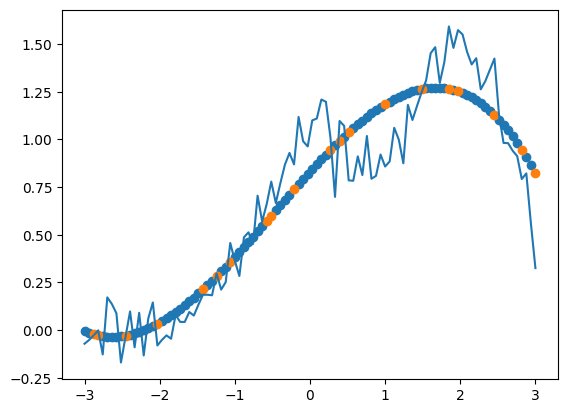

In [288]:
plt.plot(x, y)
plt.scatter(X_train[:, 0], X_train_s @ beta + y_offset)
plt.scatter(X_test[:, 0], X_test_s @ beta + y_offset)

## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

In [296]:
lam = 0.01

# Modified from Week 35
def train_to_order(split_data, p, lam): # Function for fitting a pth degree polynomial
    x_train, x_test, y_train, y_test = split_data
    X_train = polynomial_features(x_train, p)
    X_test = polynomial_features(x_test, p)

    # Scale the output
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y_train)

    beta = Ridge_parameters(X_train_s, y_train, lam)

    train_predict = X_train_s @ beta + y_offset
    test_predict = X_test_s @ beta + y_offset

    MSE_train = np.sum((y_train - train_predict)**2) / len(y_train)
    MSE_test = np.sum((y_test - test_predict)**2) / len(y_test)

    return (MSE_train, MSE_test)


split_data = train_test_split(x, y, test_size=0.2)

powers = np.arange(1,15)

MSE_deg = np.array([train_to_order(split_data, p, lam) for p in powers])

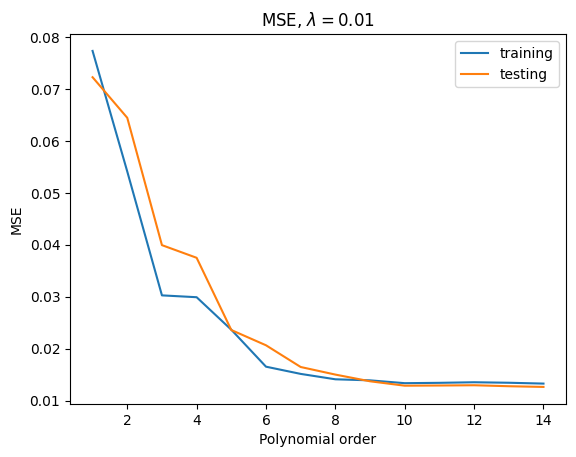

In [297]:
fig, ax = plt.subplots()
ax.plot(powers, MSE_deg[:, 0], label='training')
ax.plot(powers, MSE_deg[:, 1], label='testing')
ax.set_xlabel('Polynomial order')
ax.set_ylabel('MSE')
ax.set_title(r'MSE, $\lambda = 0.01$')
ax.legend()

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

In [298]:
p = 3

lambdas = np.logspace(-1, -5, 1000)


MSE_lam = np.array([train_to_order(split_data, p, l) for l in lambdas])

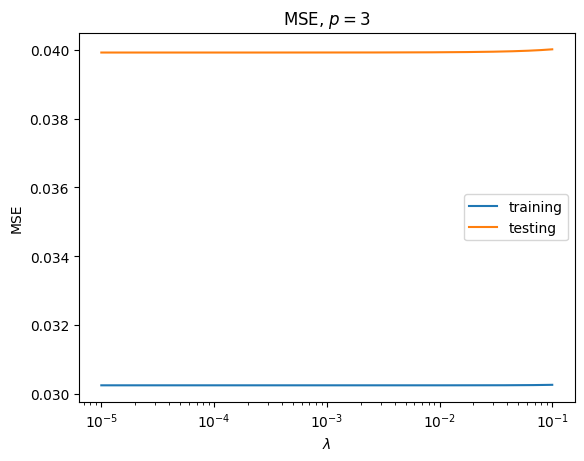

In [299]:
fig, ax = plt.subplots()
ax.plot(lambdas, MSE_lam[:, 0], label='training')
ax.plot(lambdas, MSE_lam[:, 1], label='testing')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('MSE')
ax.set_title(r'MSE, $p = 3$')
ax.set_xscale('log')
ax.legend()

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

In [300]:
import matplotlib as mpl

In [301]:
ps, ls = np.meshgrid(powers, lambdas)

def t(p, l): return train_to_order(split_data, p, l)

t_vec = np.vectorize(t)

MSE = t_vec(ps, ls)

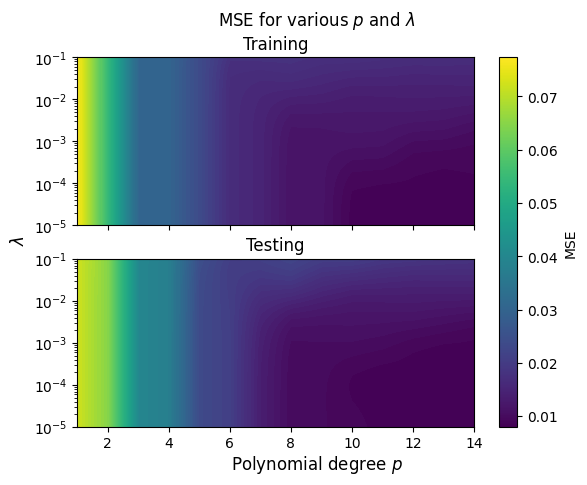

In [315]:
norm = mpl.colors.Normalize(vmin=np.min(MSE), vmax=np.max(MSE))
cmap = mpl.colormaps['viridis']
mappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)


fig, axs = plt.subplots(2, sharex=True)

ax = axs[0]
ax.contourf(ps, ls, MSE[0], levels=100, cmap=cmap, norm=norm)
ax.set_yscale('log')
ax.set_title('Training')

ax = axs[1]
ax.contourf(ps, ls, MSE[1], levels=100, cmap=cmap, norm=norm)
ax.set_yscale('log')
ax.set_title('Testing')

fig.supxlabel('Polynomial degree $p$')
fig.supylabel(r'$\lambda$')
fig.suptitle('MSE for various $p$ and ' + r'$\lambda$')
fig.colorbar(mappable, ax=axs, label='MSE')
